In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
columns = ['GFOFAIL','WEALTH','RESILIENCE','BELONG','ST004D01T','IC001Q04TA','GCSELFEFF','ESCS','EMOSUPS','ST216Q03HA']
data = pd.read_csv("Downloads/data_subset.csv",usecols=columns) 
data.head()

,ST004D01T,ST216Q03HA,IC001Q04TA,ESCS,WEALTH,EMOSUPS,GFOFAIL,RESILIENCE,GCSELFEFF,BELONG
0,2,1,1,0.6747,-0.0996,0.2127,-0.6870,0.3693,-0.4609,-0.2133
1,2,2,2,-0.7566,-0.7221,-2.0851,-0.6133,-0.4684,0.7623,-0.0845
2,1,5,3,-2.5112,-3.6051,0.6364,-0.6133,-1.5248,-0.9477,-0.0824
3,2,2,1,-3.1843,-7.0376,1.0346,-0.6870,-0.0614,0.3313,-0.0358
4,2,2,1,-1.7557,-1.8375,-0.6576,0.1097,2.3693,0.6965,0.1704


In [5]:
df = pd.DataFrame(data)
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.dropna() # drop all nan

# change all object type to numeric type
df['ESCS'] = pd.to_numeric(df['ESCS'])
df['ST004D01T'] = pd.to_numeric(df['ST004D01T'])
df['ST216Q03HA'] = pd.to_numeric(df['ST216Q03HA'])
df['IC001Q04TA'] = pd.to_numeric(df['IC001Q04TA'])


In [6]:
df['ESCS']

0         0.6747
1        -0.7566
2        -2.5112
3        -3.1843
4        -1.7557
           ...  
231853   -1.8751
231854   -3.0210
231855   -1.3621
231856    0.1740
231857   -1.0585
Name: ESCS, Length: 231858, dtype: float64

In [7]:
# check if deleting all nans
df.isna().sum()

ST004D01T     0
ST216Q03HA    0
IC001Q04TA    0
ESCS          0
WEALTH        0
EMOSUPS       0
GFOFAIL       0
RESILIENCE    0
GCSELFEFF     0
BELONG        0
dtype: int64

In [8]:
# check the correlation among all variables
df.corr()

,ST004D01T,ST216Q03HA,IC001Q04TA,ESCS,WEALTH,EMOSUPS,GFOFAIL,RESILIENCE,GCSELFEFF,BELONG
ST004D01T,1.000000,-0.056285,0.024200,0.001477,0.025254,-0.079749,-0.153858,0.023170,0.007950,0.016550
ST216Q03HA,-0.056285,1.000000,0.045295,-0.098718,-0.079684,-0.137393,0.135016,-0.319046,-0.185577,-0.195096
IC001Q04TA,0.024200,0.045295,1.000000,-0.309483,-0.359884,-0.090546,-0.008740,-0.025828,-0.054400,-0.075262
ESCS,0.001477,-0.098718,-0.309483,1.000000,0.667454,0.136971,0.024646,0.074975,0.179948,0.096773
WEALTH,0.025254,-0.079684,-0.359884,0.667454,1.000000,0.115105,0.029425,0.059981,0.100221,0.114580
EMOSUPS,-0.079749,-0.137393,-0.090546,0.136971,0.115105,1.000000,-0.025714,0.307471,0.159518,0.259570
GFOFAIL,-0.153858,0.135016,-0.008740,0.024646,0.029425,-0.025714,1.000000,-0.125057,-0.001484,-0.178724
RESILIENCE,0.023170,-0.319046,-0.025828,0.074975,0.059981,0.307471,-0.125057,1.000000,0.301858,0.313197
GCSELFEFF,0.007950,-0.185577,-0.054400,0.179948,0.100221,0.159518,-0.001484,0.301858,1.000000,0.128204
BELONG,0.016550,-0.195096,-0.075262,0.096773,0.114580,0.259570,-0.178724,0.313197,0.128204,1.000000


In [9]:
# check for multilinearity among all variables 
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
X = df[columns]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

      feature       VIF
0     GFOFAIL  1.074733
1      WEALTH  2.143140
2  RESILIENCE  1.332803
3      BELONG  1.190285
4   ST004D01T  6.002436
5  IC001Q04TA  6.116508
6   GCSELFEFF  1.145073
7        ESCS  1.930653
8     EMOSUPS  1.164322
9  ST216Q03HA  5.101592


In [10]:
dfDummies = pd.get_dummies(df, drop_first=True)
dfDummies
# plt.figure(figsize=(14,12))
# sns.heatmap(dfDummies.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
# plt.yticks(rotation=0);
# print(dfDummies)

,ST004D01T,ST216Q03HA,IC001Q04TA,ESCS,WEALTH,EMOSUPS,GFOFAIL,RESILIENCE,GCSELFEFF,BELONG
0,2,1,1,0.6747,-0.0996,0.2127,-0.6870,0.3693,-0.4609,-0.2133
1,2,2,2,-0.7566,-0.7221,-2.0851,-0.6133,-0.4684,0.7623,-0.0845
2,1,5,3,-2.5112,-3.6051,0.6364,-0.6133,-1.5248,-0.9477,-0.0824
3,2,2,1,-3.1843,-7.0376,1.0346,-0.6870,-0.0614,0.3313,-0.0358
4,2,2,1,-1.7557,-1.8375,-0.6576,0.1097,2.3693,0.6965,0.1704
...,...,...,...,...,...,...,...,...,...,...
231853,2,3,1,-1.8751,-0.6935,-0.6576,-1.8939,-0.0614,0.1904,-0.1182
231854,2,3,1,-3.0210,-2.4741,-0.6576,-1.8939,2.3693,0.1904,-0.9879
231855,2,3,2,-1.3621,-0.1630,-1.8624,-1.1597,-1.4033,-0.8238,-0.8735
231856,2,2,1,0.1740,-1.3599,1.0346,-0.9598,2.3693,0.1904,-0.6398


In [11]:
desc = df.describe()
desc

,ST004D01T,ST216Q03HA,IC001Q04TA,ESCS,WEALTH,EMOSUPS,GFOFAIL,RESILIENCE,GCSELFEFF,BELONG
count,231858.000000,231858.000000,231858.000000,231858.000000,231858.000000,231858.000000,231858.000000,231858.000000,231858.000000,231858.000000
mean,1.489731,2.379137,1.129114,-0.205012,-0.365819,-0.026714,0.026203,0.061785,-0.001335,-0.033729
std,0.499896,1.047296,0.459343,1.044193,1.034937,1.001820,0.992589,1.001256,1.016611,1.006774
min,1.000000,1.000000,1.000000,-7.751600,-7.546500,-2.446800,-1.893900,-3.167500,-2.714200,-3.316100
25%,1.000000,2.000000,1.000000,-0.895800,-0.965600,-0.657600,-0.687000,-0.517600,-0.585100,-0.665900
50%,1.000000,2.000000,1.000000,-0.131300,-0.330250,0.212700,0.052000,-0.061400,0.004300,-0.318400
75%,2.000000,3.000000,1.000000,0.615800,0.270100,1.034600,0.463700,0.639700,0.493725,0.462900
max,2.000000,5.000000,3.000000,3.999100,4.627800,1.034600,1.890500,2.766700,2.353500,3.233900


Text(0, 0.5, 'probability')

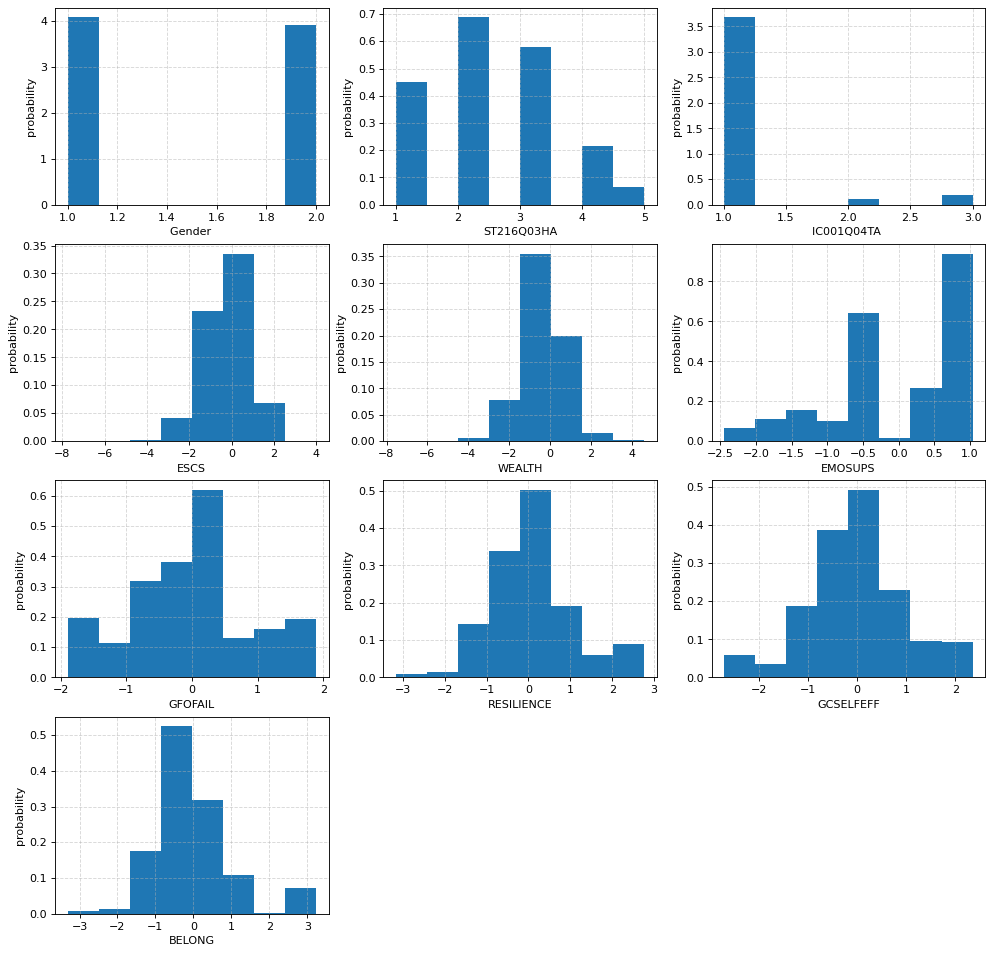

In [13]:
from matplotlib import pyplot as plt
fig1 = plt.figure(num=10, figsize=(15, 15),dpi=80)

ax01 = fig1.add_subplot(4,3,1)  
ax02 = fig1.add_subplot(4,3,2)
ax03 = fig1.add_subplot(4,3,3)
ax11 = fig1.add_subplot(4,3,4)  
ax12 = fig1.add_subplot(4,3,5)
ax13 = fig1.add_subplot(4,3,6)
ax14 = fig1.add_subplot(4,3,7)
ax15 = fig1.add_subplot(4,3,8)  
ax16 = fig1.add_subplot(4,3,9)
ax17 = fig1.add_subplot(4,3,10)

ax01.hist(df['ST004D01T'], bins=8, density=True)                     
ax01.grid(linestyle="--", alpha=0.5)
ax01.set_xlabel("Gender ")
ax01.set_ylabel("probability")

ax02.hist(df['ST216Q03HA'], bins=8, density=True)                     
ax02.grid(linestyle="--", alpha=0.5)
ax02.set_xlabel("ST216Q03HA")
ax02.set_ylabel("probability")

ax03.hist(df['IC001Q04TA'], bins=8, density=True)                     
ax03.grid(linestyle="--", alpha=0.5)
ax03.set_xlabel("IC001Q04TA ")
ax03.set_ylabel("probability")

ax11.hist(df['ESCS'], bins=8, density=True)                     
ax11.grid(linestyle="--", alpha=0.5)
ax11.set_xlabel("ESCS")
ax11.set_ylabel("probability")

ax12.hist(df['WEALTH'], bins=8, density=True)                     
ax12.grid(linestyle="--", alpha=0.5)
ax12.set_xlabel("WEALTH")
ax12.set_ylabel("probability")

ax13.hist(df['EMOSUPS'], bins=8, density=True)                     
ax13.grid(linestyle="--", alpha=0.5)
ax13.set_xlabel("EMOSUPS")
ax13.set_ylabel("probability")

ax14.hist(df['GFOFAIL'], bins=8, density=True)                     
ax14.grid(linestyle="--", alpha=0.5)
ax14.set_xlabel("GFOFAIL")
ax14.set_ylabel("probability")

ax15.hist(df['RESILIENCE'], bins=8, density=True)                     
ax15.grid(linestyle="--", alpha=0.5)
ax15.set_xlabel("RESILIENCE")
ax15.set_ylabel("probability")

ax16.hist(df['GCSELFEFF'], bins=8, density=True)                     
ax16.grid(linestyle="--", alpha=0.5)
ax16.set_xlabel("GCSELFEFF")
ax16.set_ylabel("probability")

ax17.hist(df['BELONG'], bins=8, density=True)                     
ax17.grid(linestyle="--", alpha=0.5)
ax17.set_xlabel("BELONG")
ax17.set_ylabel("probability")